### Libraries

In [26]:
import numpy as np
import random
from imageio.v2 import imread
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
import os

dataset = r'C:\Users\Mewandi\Desktop\MI\Neural_Network\Cars_Images'
os.listdir(dataset)

['Test', 'Train']

In [28]:
train_data = dataset + '\\Train\\'
test_data = dataset + '\\Test\\'

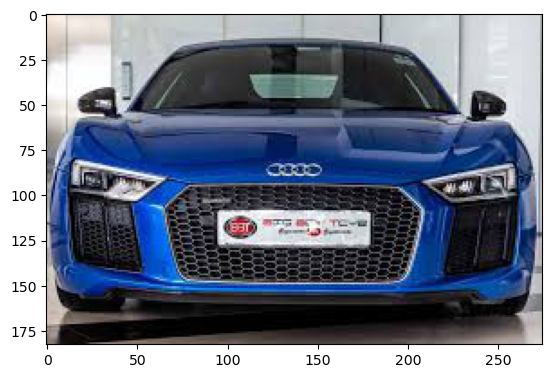

In [29]:
os.listdir(train_data + '\\audi\\' )[0]
img = imread(train_data + '\\audi\\' + '1.jpg')
plt.imshow(img)

In [30]:
img.shape

(183, 275, 3)

In [31]:
os.listdir(test_data + '\\audi\\' )[0]

'21.jpg'

In [32]:
classes = ['audi_cars', 'lamborghini_cars', 'mercedes_cars']

In [33]:
def grabe_classes_labels(num_images, labels='Null'):
    y = []
    cars_image = []

    image_0 = os.listdir(train_data + 'audi' )
    image_1 = os.listdir(train_data + 'lamborghini' )
    image_2 = os.listdir(train_data + 'mercedes' )

    for i in range(num_images):

        p = random.randint(0,2)
        if p == 0:
            for audi in (image_0):
                new_images = np.array(imread(train_data + '\\audi\\' + audi))
        elif p == 1:
            for lamborghini in (image_1):
                new_images = np.array(imread(train_data + '\\lamborghini\\' + lamborghini))
        elif p == 2:
            for mercedes in (image_2):
                new_images = np.array(imread(train_data + '\\mercedes\\' + mercedes))
                
        cars_image.append(new_images)
        
        if labels != 'NULL':
            y.append(labels)
    return cars_image, y

In [34]:
img_audi, labels_audi = grabe_classes_labels(3, labels='0')

In [35]:
img_lamborghini, labels_lamborghini = grabe_classes_labels(3, labels='1')

In [36]:
img_mercedes, labels_mercedes = grabe_classes_labels(3, labels='2')

### Resize the images to concatenate

In [37]:
resized_img_audi = [np.array(Image.fromarray(img).resize((32, 32,))) for img in img_audi]
resized_img_lamborghini = [np.array(Image.fromarray(img).resize((32, 32))) for img in img_lamborghini]
resized_img_mercedes = [np.array(Image.fromarray(img).resize((32, 32))) for img in img_mercedes]

In [38]:
train_imgs = np.concatenate((resized_img_audi,resized_img_lamborghini,resized_img_mercedes))
train_imgs = train_imgs / 255

train_labels = np.concatenate((labels_audi,labels_lamborghini,labels_mercedes))

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
                                  rotation_range = 20,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  shear_range = 0.5,
                                  zoom_range = 0.1,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest'
                             )

<function matplotlib.pyplot.show(close=None, block=None)>

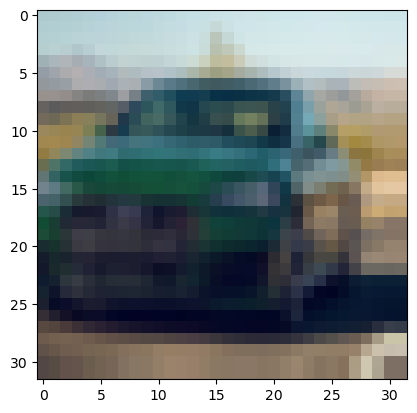

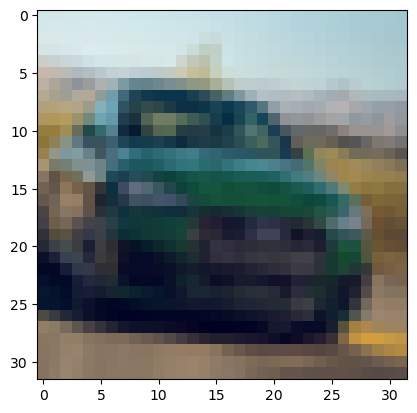

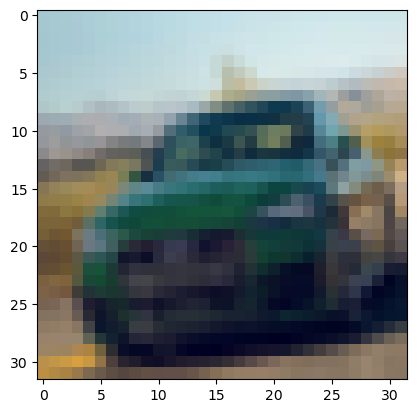

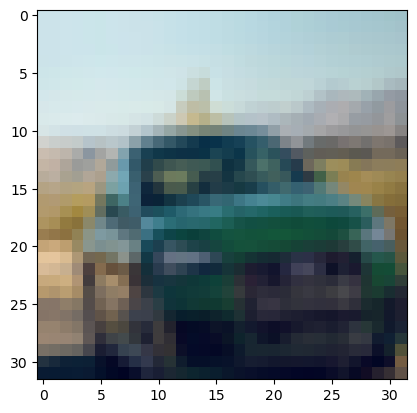

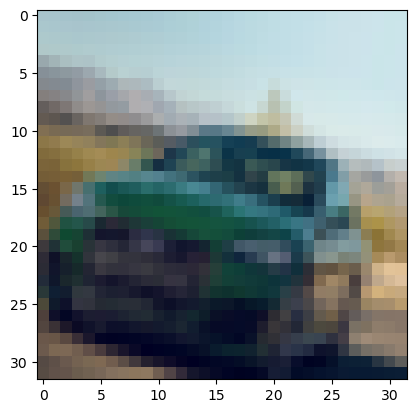

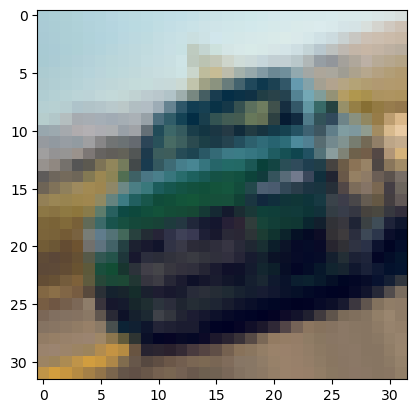

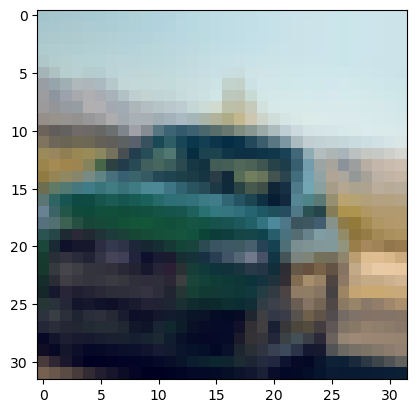

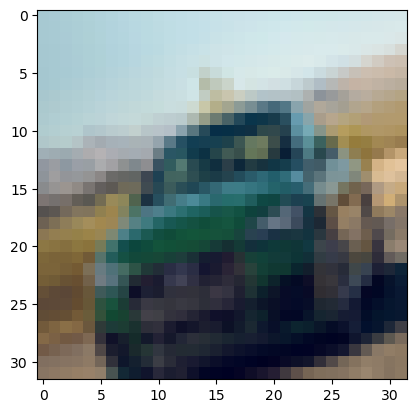

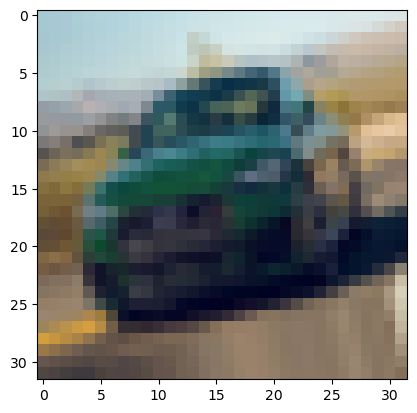

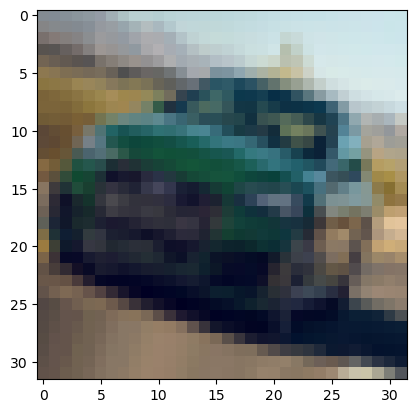

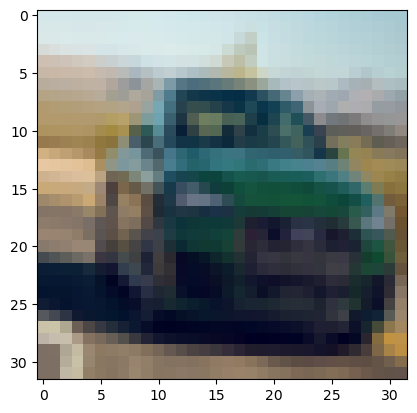

In [40]:
idx = 0
new_train_img = []
new_train_label = []

for image in train_imgs:
    img = image.reshape((1,)+image.shape)

    i = 0
    for batch in image_gen.flow(img, save_prefix='test', save_format='jpeg'):
        plt.figure(i)
        plot = plt.imshow(batch[0])
        i += 1

    
        new_train_img.append(batch[0])
        new_train_label.append(train_labels[idx])

        if i > 10:
            break
    idx += 1

plt.show

In [41]:
new_train_img =  np.array(new_train_img)
new_train_label = np.array(new_train_label)

## Creat the model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,696 (209.75 KB)

 Trainable params: 53,696 (209.75 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3))

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,355 (610.76 KB)

 Trainable params: 156,355 (610.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [46]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
int_labels = le.fit_transform(new_train_label)  # list of string labels

# One-hot encode the integer labels
new_train_label_cate = to_categorical(int_labels) 

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(new_train_img, new_train_label_cate, epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step - accuracy: 0.4089 - loss: 3.6145
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.3510 - loss: 1.0843
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.3427 - loss: 1.0888
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.4239 - loss: 1.0851
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.4487 - loss: 1.0735
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.4988 - loss: 1.0727
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.5623 - loss: 1.0679
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.4782 - loss: 1.0724
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.4779 - loss: 1.0740
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.4463 - loss: 1.0649


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step


Text(0.5, 1.0, 'mercedes_cars')

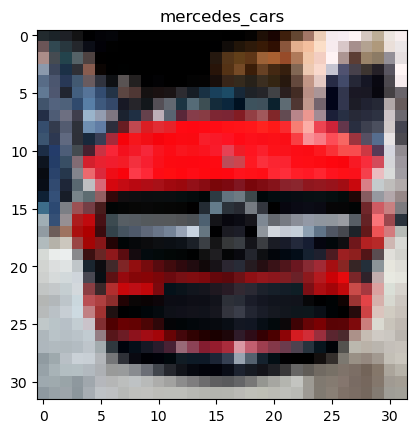

In [48]:
test_image, _ = grabe_classes_labels(40) #  _ is because we did not add the label parameter into capture_img()

test_image_resized = [np.array(Image.fromarray(img).resize((32, 32,))) for img in test_image]
test_image_resized = np.array(test_image_resized) / 255

prediction = model.predict(test_image_resized)
plt.imshow(test_image_resized[0])
plt.title(classes[np.argmax(prediction[0])])

# Let's play the game

In [49]:
from IPython.display import clear_output
import time
import random

clear_output() # To clear the page
print("**********************************************************")
print("Welcome to Audi_cars, Lamborghini_cars, Mercedes_cars")
print("**********************************************************")

for i in range(3):
    time.sleep(1)
    clear_output()
    print("**********************************************************")
    print("Welcome to Audi_cars, Lamborghini_cars, Mercedes_cars")
    print("**********************************************************")
    print(3-i)

# User's selection
clear_output()
print("Audi_cars ----> Lamborghini_cars ----> Mercedes_cars")
test_image, _ = grabe_classes_labels(1) #  _ is because we did not add the label parameter into capture_img()
test_image_resized = [np.array(Image.fromarray(img).resize((32, 32,))) for img in test_image]
test_image_resized = np.array(test_image_resized) / 255
prediction = model.predict(test_image_resized)
clear_output()
user_selection = classes[np.argmax(prediction[0])]
print(f"User's Selection: {user_selection}")

# Computer's selection
random_int = random.randint(0, 2)
computer_selection = classes[random_int]
print(f"Computer's Selection: {computer_selection}")

if user_selection == 'mercedes_cars':
    if computer_selection == 'mercedes_cars':
        print('Warmest Congratulation,You won the game')
    elif computer_selection == 'lamborghini_cars' or computer_selection == 'audi_cars':
        print("Unfortunately you lost the game")

if user_selection == 'lamborghini_cars':
    if computer_selection == 'lamborghini_cars':
        print('Warmest Congratulation,You won the game')
    elif computer_selection == 'mercedes_cars' or computer_selection == 'audi_cars':
        print("Unfortunately you lost the game")

if user_selection == 'audi_cars':
    if computer_selection == 'audi_cars':
        print('Warmest Congratulation,You won the game')
    elif computer_selection == 'mercedes_cars' or computer_selection == 'lamborghini_cars':
        print("Unfortunately you lost the game")

User's Selection: mercedes_cars
Computer's Selection: mercedes_cars
Warmest Congratulation,You won the game
